# Requirements

In [ ]:
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.8.0


In [ ]:
pip install tensorflow==2.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

In [ ]:
pip uninstall protobuf

Found existing installation: protobuf 4.25.5
Uninstalling protobuf-4.25.5:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/google/_upb/_message.abi3.so
    /usr/local/lib/python3.10/dist-packages/google/protobuf/*
    /usr/local/lib/python3.10/dist-packages/protobuf-4.25.5.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled protobuf-4.25.5


In [ ]:
pip install protobuf==3.20.0

  Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (698 bytes)
Using cached protobuf-3.20.0-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.10 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-api-core 2.19.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-aiplatform 1.74.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery-connection 1.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Constants and Parameters

In [ ]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018

In [ ]:
#Model
NO_EPOCHS = 35
BATCH_SIZE = 128

In [ ]:
IS_LOCAL = False

In [ ]:
import os

In [ ]:
PATH="/content/fashion_mnist"
print(os.listdir(PATH))

['fashion-mnist_test.csv', 'train-images-idx3-ubyte', 't10k-images-idx3-ubyte', 'fashion-mnist_train.csv', 't10k-labels-idx1-ubyte', 'train-labels-idx1-ubyte']


# Load the data

Each example is a 28x28 grayscale image (784 pixels), associated with a label from 10 classes(type of clothing)
Each pixel has a single pixel-value associated with it, indicating the grayscale value of that pixel between 0 and 255.

The training and test data sets have 785 columns.
The first column consists of the class labels (label), and represents the article of clothing.
The rest of 784 columns (1-785) contain the pixel-values of the associated image.

In [ ]:
train_file = "/content/fashion_mnist/fashion-mnist_train.csv"
test_file  = "/content/fashion_mnist/fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [ ]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


Training set has 60,000 examples and a test set has 10,000 examples of images

In [ ]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Class Distribution

In [ ]:
# Create a dictionary for each type of label (mapping)
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

There are 10 different classes of images:

0: T-shirt/top,

1: Trouser,

2: Pullover,

3: Dress,

4: Coat,

5: Sandal,

6: Shirt,

7: Sneaker,

8: Bag,

9: Ankle boot

**Train Set:**

In [ ]:
def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

In [ ]:
get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


The classes are equaly distributed in the train set (10% each).

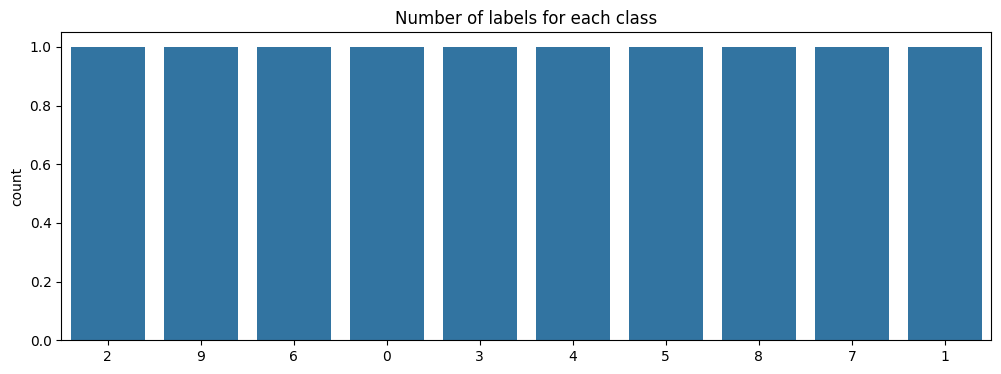

In [ ]:
def plot_label_per_class(data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(data.label, order = data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))
    plt.show()

plot_label_per_class(train_data)

**Test Set:**

In [ ]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


In the test set the 10 classes are equaly distributed (10% each).

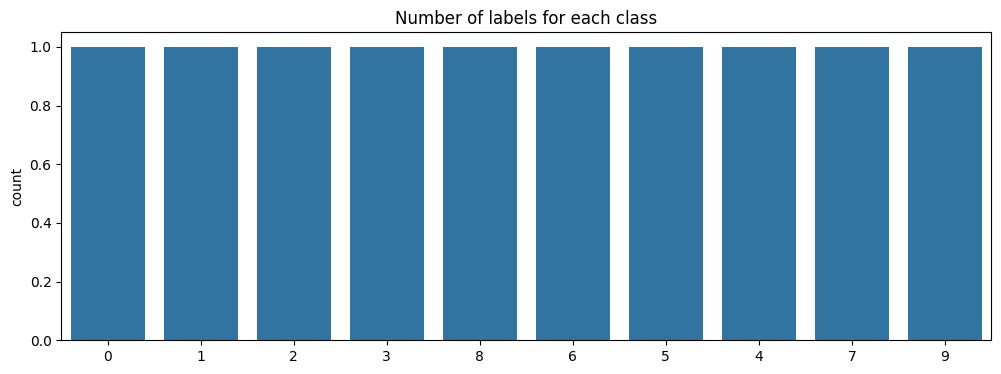

In [ ]:
plot_label_per_class(test_data)

# Sample Images

In [ ]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

**Train Set Images:**

In [ ]:
train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


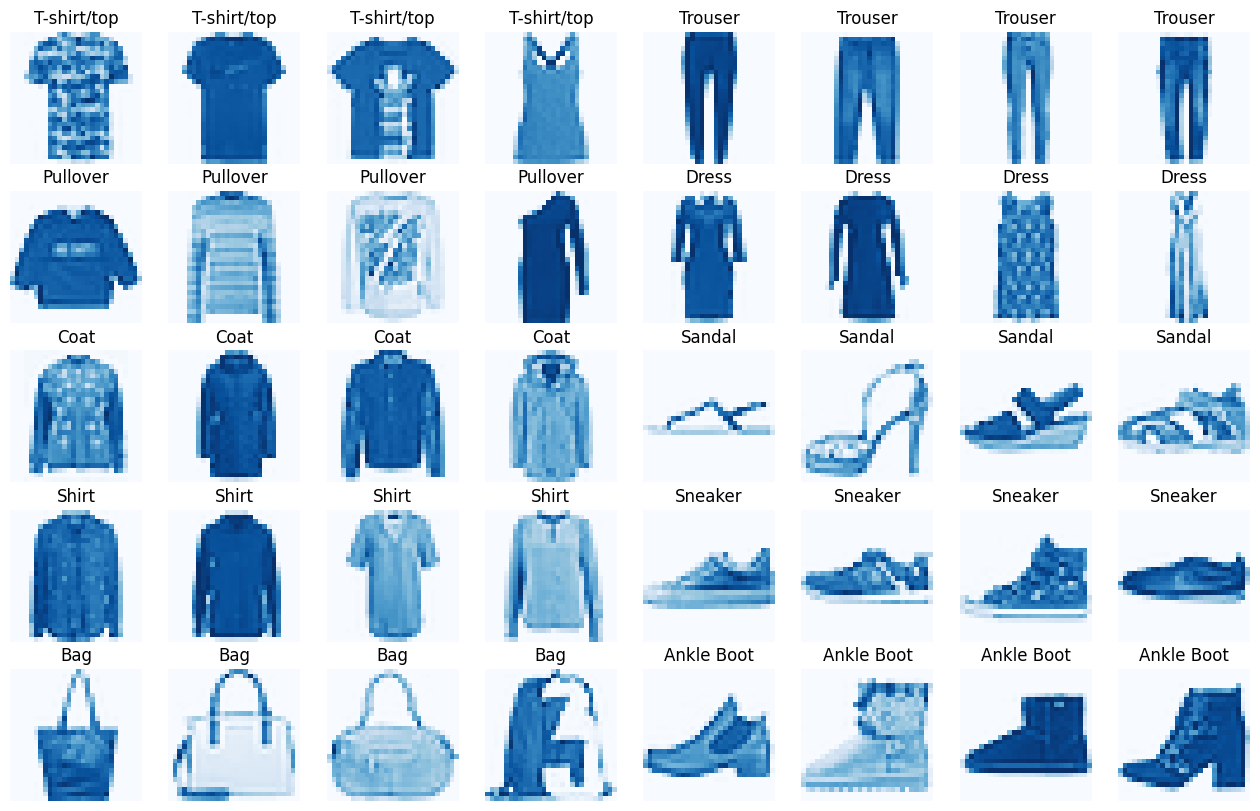

In [ ]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()

plot_sample_images(train_sample_images,train_sample_labels, "Blues")

**Test Set Images:**

Total number of sample images to plot:  40


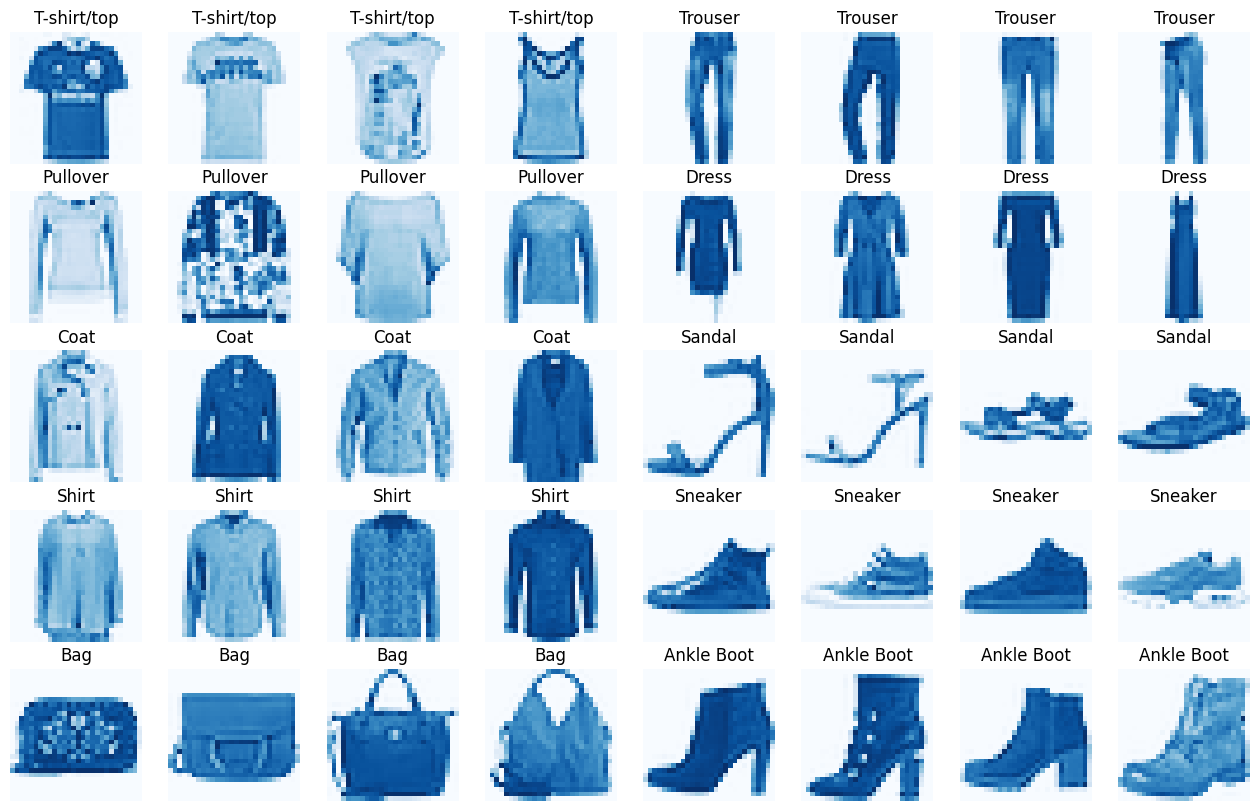

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# Model Preparation

# Data preprocessing

Reshape the columns from (784) to (28,28,1).

Save label (target) feature as a separate vector.



In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
# data preprocessing
def data_preprocessing(raw):
    out_y =tensorflow.keras.utils.to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

In [ ]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

# Data splitting (train and validation)

Split the train set in train and validation set (0.8/0.2), the validation set will be 20% from the original train set

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [ ]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


**Check Class Imbalance**

In [ ]:
def plot_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    f, ax = plt.subplots(1,1, figsize=(12,4))
    g = sns.countplot(ydf[0], order = np.arange(0,10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0,10)):
        g.annotate(labels[label], (p.get_x(), p.get_height()+0.1))

    plt.show()

In [ ]:
def get_count_per_class(yd):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

**For Train Set:**

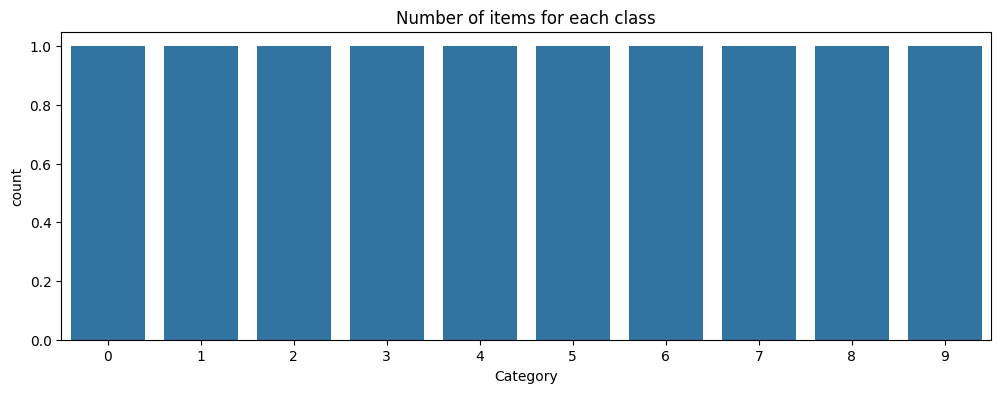

Dress               :   4891 or 10.189583333333333%
Sandal              :   4855 or 10.114583333333334%
Pullover            :   4836 or 10.075000000000001%
Ankle Boot          :   4827 or 10.05625%
Sneaker             :   4798 or 9.995833333333334%
Coat                :   4796 or 9.991666666666667%
Shirt               :   4779 or 9.95625%
Bag                 :   4757 or 9.910416666666666%
Trouser             :   4745 or 9.885416666666668%
T-shirt/top         :   4716 or 9.825000000000001%


In [ ]:
plot_count_per_class(np.argmax(y_train,axis=1))
get_count_per_class(np.argmax(y_train,axis=1))

**For Validation Set:**

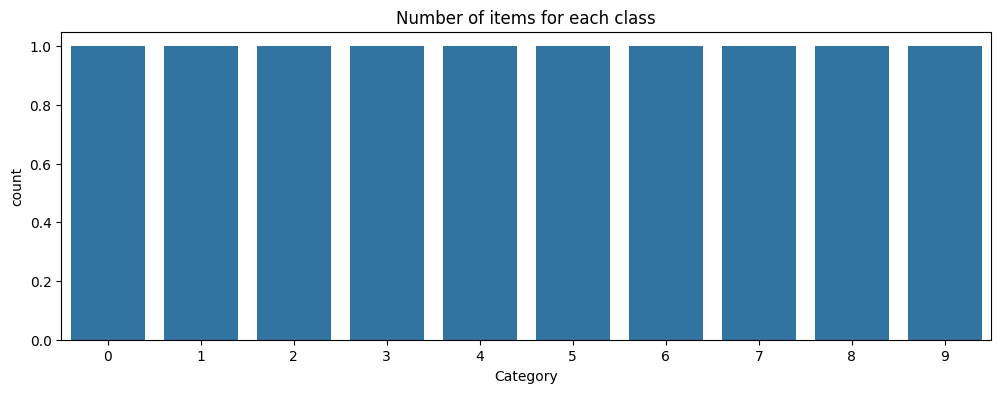

T-shirt/top         :   1284 or 10.7%
Trouser             :   1255 or 10.458333333333334%
Bag                 :   1243 or 10.358333333333333%
Shirt               :   1221 or 10.174999999999999%
Coat                :   1204 or 10.033333333333333%
Sneaker             :   1202 or 10.016666666666667%
Ankle Boot          :   1173 or 9.775%
Pullover            :   1164 or 9.700000000000001%
Sandal              :   1145 or 9.541666666666666%
Dress               :   1109 or 9.241666666666665%


In [ ]:
plot_count_per_class(np.argmax(y_val,axis=1))
get_count_per_class(np.argmax(y_val,axis=1))

# Model Training

In [ ]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

Using a Sequential model.

The Sequential model is a linear stack of layers. It can be first initialized and then we add layers using add method or we can add all layers at init stage.

**Conv2D** is a 2D Convolutional layer (i.e. spatial convolution over images). The parameters used are:

filters - the number of filters (Kernels) used with this layer; here filters = 32,

kernel_size - the dimmension of the Kernel: (3 x 3),

activation - is the activation function used, in this case relu,

kernel_initializer - the function used for initializing the kernel,

input_shape - is the shape of the image presented to the CNN: in this case is 28 x 28 .
The input and output of the Conv2D is a 4D tensor.


**MaxPooling2D** is a Max pooling operation for spatial data. Parameters used here are:

pool_size, in this case (2,2), representing the factors by which to downscale in both directions,

Conv2D with the following parameters:

filters: 64,

kernel_size : (3 x 3),

activation : relu,


Conv2D with the following parameters:

filters: 128,

kernel_size : (3 x 3),

activation : relu,

**Flatten**:  This layer Flattens the input and does not affect the batch size. It is used without parameters.

**Dense**: This layer is a regular fully-connected NN layer.

units - this is a positive integer representing dimensionality of the output space, in this case is: 128,

activation - activation function : relu,

Dense. This is the final layer (fully connected). It is used with the parameters:

units: the number of classes (in this case 10),

activation : softmax; for this final layer it is used softmax activation (standard for multiclass classification)


Then we compile the model with the following parameters:

loss,

optimizer,

metrics.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

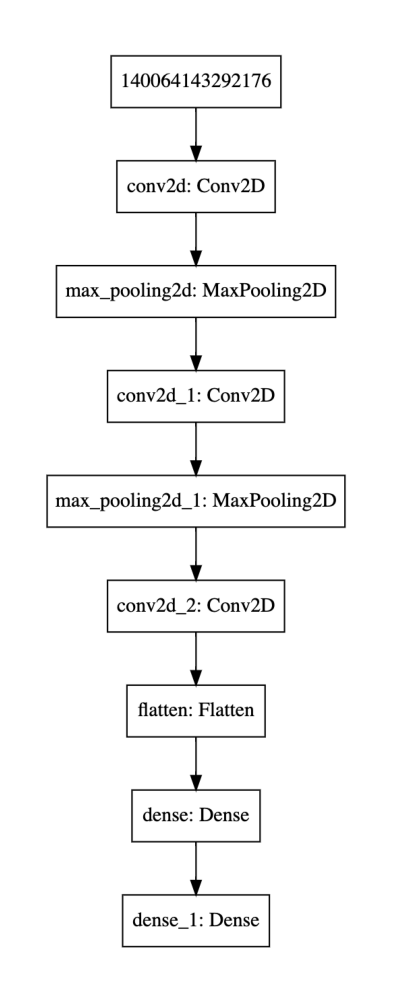

In [ ]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/35
375/375 [==============================] - 44s 116ms/step - loss: 0.5496 - accuracy: 0.8003 - val_loss: 0.3718 - val_accuracy: 0.8654
Epoch 2/35
375/375 [==============================] - 49s 131ms/step - loss: 0.3371 - accuracy: 0.8785 - val_loss: 0.3182 - val_accuracy: 0.8863
Epoch 3/35
375/375 [==============================] - 41s 108ms/step - loss: 0.2896 - accuracy: 0.8946 - val_loss: 0.2903 - val_accuracy: 0.8981
Epoch 4/35
375/375 [==============================] - 41s 108ms/step - loss: 0.2574 - accuracy: 0.9055 - val_loss: 0.2729 - val_accuracy: 0.9012
Epoch 5/35
375/375 [==============================] - 40s 107ms/step - loss: 0.2324 - accuracy: 0.9139 - val_loss: 0.2758 - val_accuracy: 0.8997
Epoch 6/35
375/375 [==============================] - 39s 105ms/step - loss: 0.2062 - accuracy: 0.9238 - val_loss: 0.2700 - val_accuracy: 0.9036
Epoch 7/35
375/375 [==============================] - 42s 111ms/step - loss: 0.1892 - accuracy: 0.9302 - val_loss: 0.2553 - val_ac

# Test Prediction Accuracy

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5930607914924622
Test accuracy: 0.9111999869346619


Test accuracy is about 0.91, based on the predicted values for the test set.

# Validation Accuracy and Loss

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

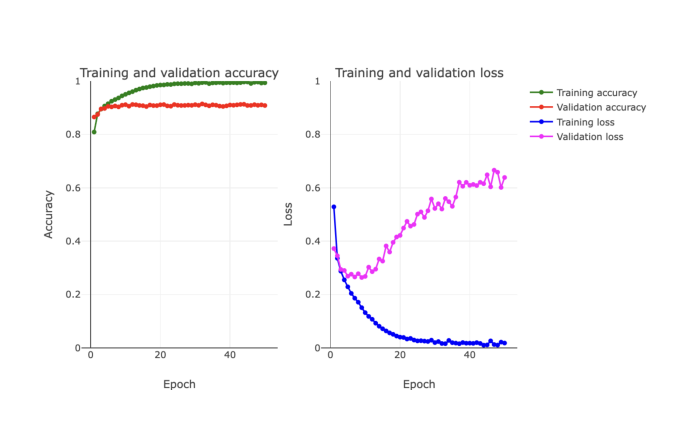

In [ ]:
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))

    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")

    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])


    iplot(fig, filename='accuracy-loss')

plot_accuracy_and_loss(train_model)

As per the graph, the validation accuracy stops improving after first few epochs and the validation loss is increasing after few epochs.

This means that the model is overfitted, to overcome this, we will use Dropout layers.

# Adding dropout layers

In [ ]:
# Model
model2 = Sequential()
# Add convolution 2D
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model2.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model2.add(Dropout(0.25))
model2.add(Conv2D(64,
                 kernel_size=(3, 3),
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model2.add(Dropout(0.25))
model2.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model2.add(Dropout(0.4))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
# Add dropouts to the model
model2.add(Dropout(0.3))
model2.add(Dense(NUM_CLASSES, activation='softmax'))


model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [ ]:
plot_model(model2, to_file='model2.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

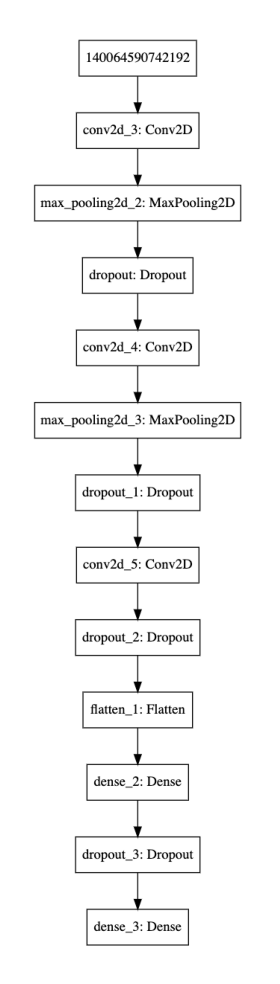

In [ ]:
plot_model(model2, to_file='model2.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Retrain the Model

In [ ]:
train_model = model2.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/35
375/375 [==============================] - 51s 134ms/step - loss: 0.7598 - accuracy: 0.7148 - val_loss: 0.4877 - val_accuracy: 0.8208
Epoch 2/35
375/375 [==============================] - 47s 125ms/step - loss: 0.4968 - accuracy: 0.8165 - val_loss: 0.3950 - val_accuracy: 0.8567
Epoch 3/35
375/375 [==============================] - 47s 125ms/step - loss: 0.4237 - accuracy: 0.8453 - val_loss: 0.3424 - val_accuracy: 0.8752
Epoch 4/35
375/375 [==============================] - 47s 126ms/step - loss: 0.3793 - accuracy: 0.8626 - val_loss: 0.3192 - val_accuracy: 0.8881
Epoch 5/35
375/375 [==============================] - 45s 120ms/step - loss: 0.3506 - accuracy: 0.8718 - val_loss: 0.3035 - val_accuracy: 0.8904
Epoch 6/35
375/375 [==============================] - 45s 120ms/step - loss: 0.3345 - accuracy: 0.8766 - val_loss: 0.2849 - val_accuracy: 0.8969
Epoch 7/35
375/375 [==============================] - 45s 120ms/step - loss: 0.3200 - accuracy: 0.8821 - val_loss: 0.2708 - val_ac

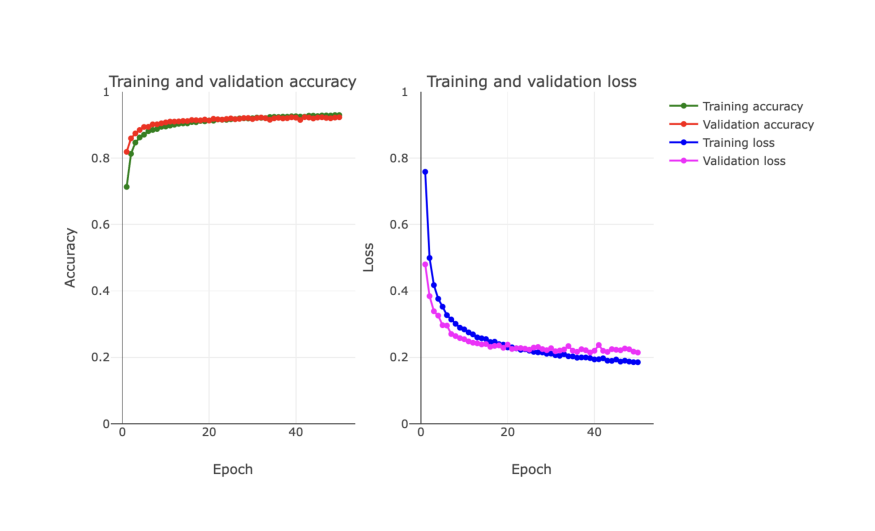

In [ ]:
plot_accuracy_and_loss(train_model)

After adding the Dropout layers, the validation accuracy and validation loss are much better as per the graph.

# Prediction Accuracy with dropout layers

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20247195200026036
Test accuracy: 0.9294


The test accuracy has improved from 0.91 to about 0.93.

In [ ]:
#get the predictions for the test data
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
#get the indices to be plotted
y_true = test_data.iloc[:, 0]

In [ ]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9294
Incorrect predicted classes: 706


In [ ]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))


                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.88      0.88      0.88      1000
    Class 1 (Trouser) :       0.99      0.99      0.99      1000
   Class 2 (Pullover) :       0.91      0.88      0.89      1000
      Class 3 (Dress) :       0.93      0.93      0.93      1000
       Class 4 (Coat) :       0.88      0.90      0.89      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.79      0.80      0.80      1000
    Class 7 (Sneaker) :       0.97      0.96      0.96      1000
        Class 8 (Bag) :       0.99      0.99      0.99      1000
 Class 9 (Ankle Boot) :       0.96      0.98      0.97      1000

            avg / total :       0.93      0.93      0.93     10000
    


The best accuracy is obtained for Class 1, Class 5, Class 7, Class 8 and Class 9. Worst accuracy is for Class 6.

The recall is highest for Class 5 and Class 8 and least for Class 4 and Class 6.

f1-score is highest for Class 1, Class 5 and Class 8 and lowest for Class 6, Class 4 and Class 2.


# Correctly Classified Images

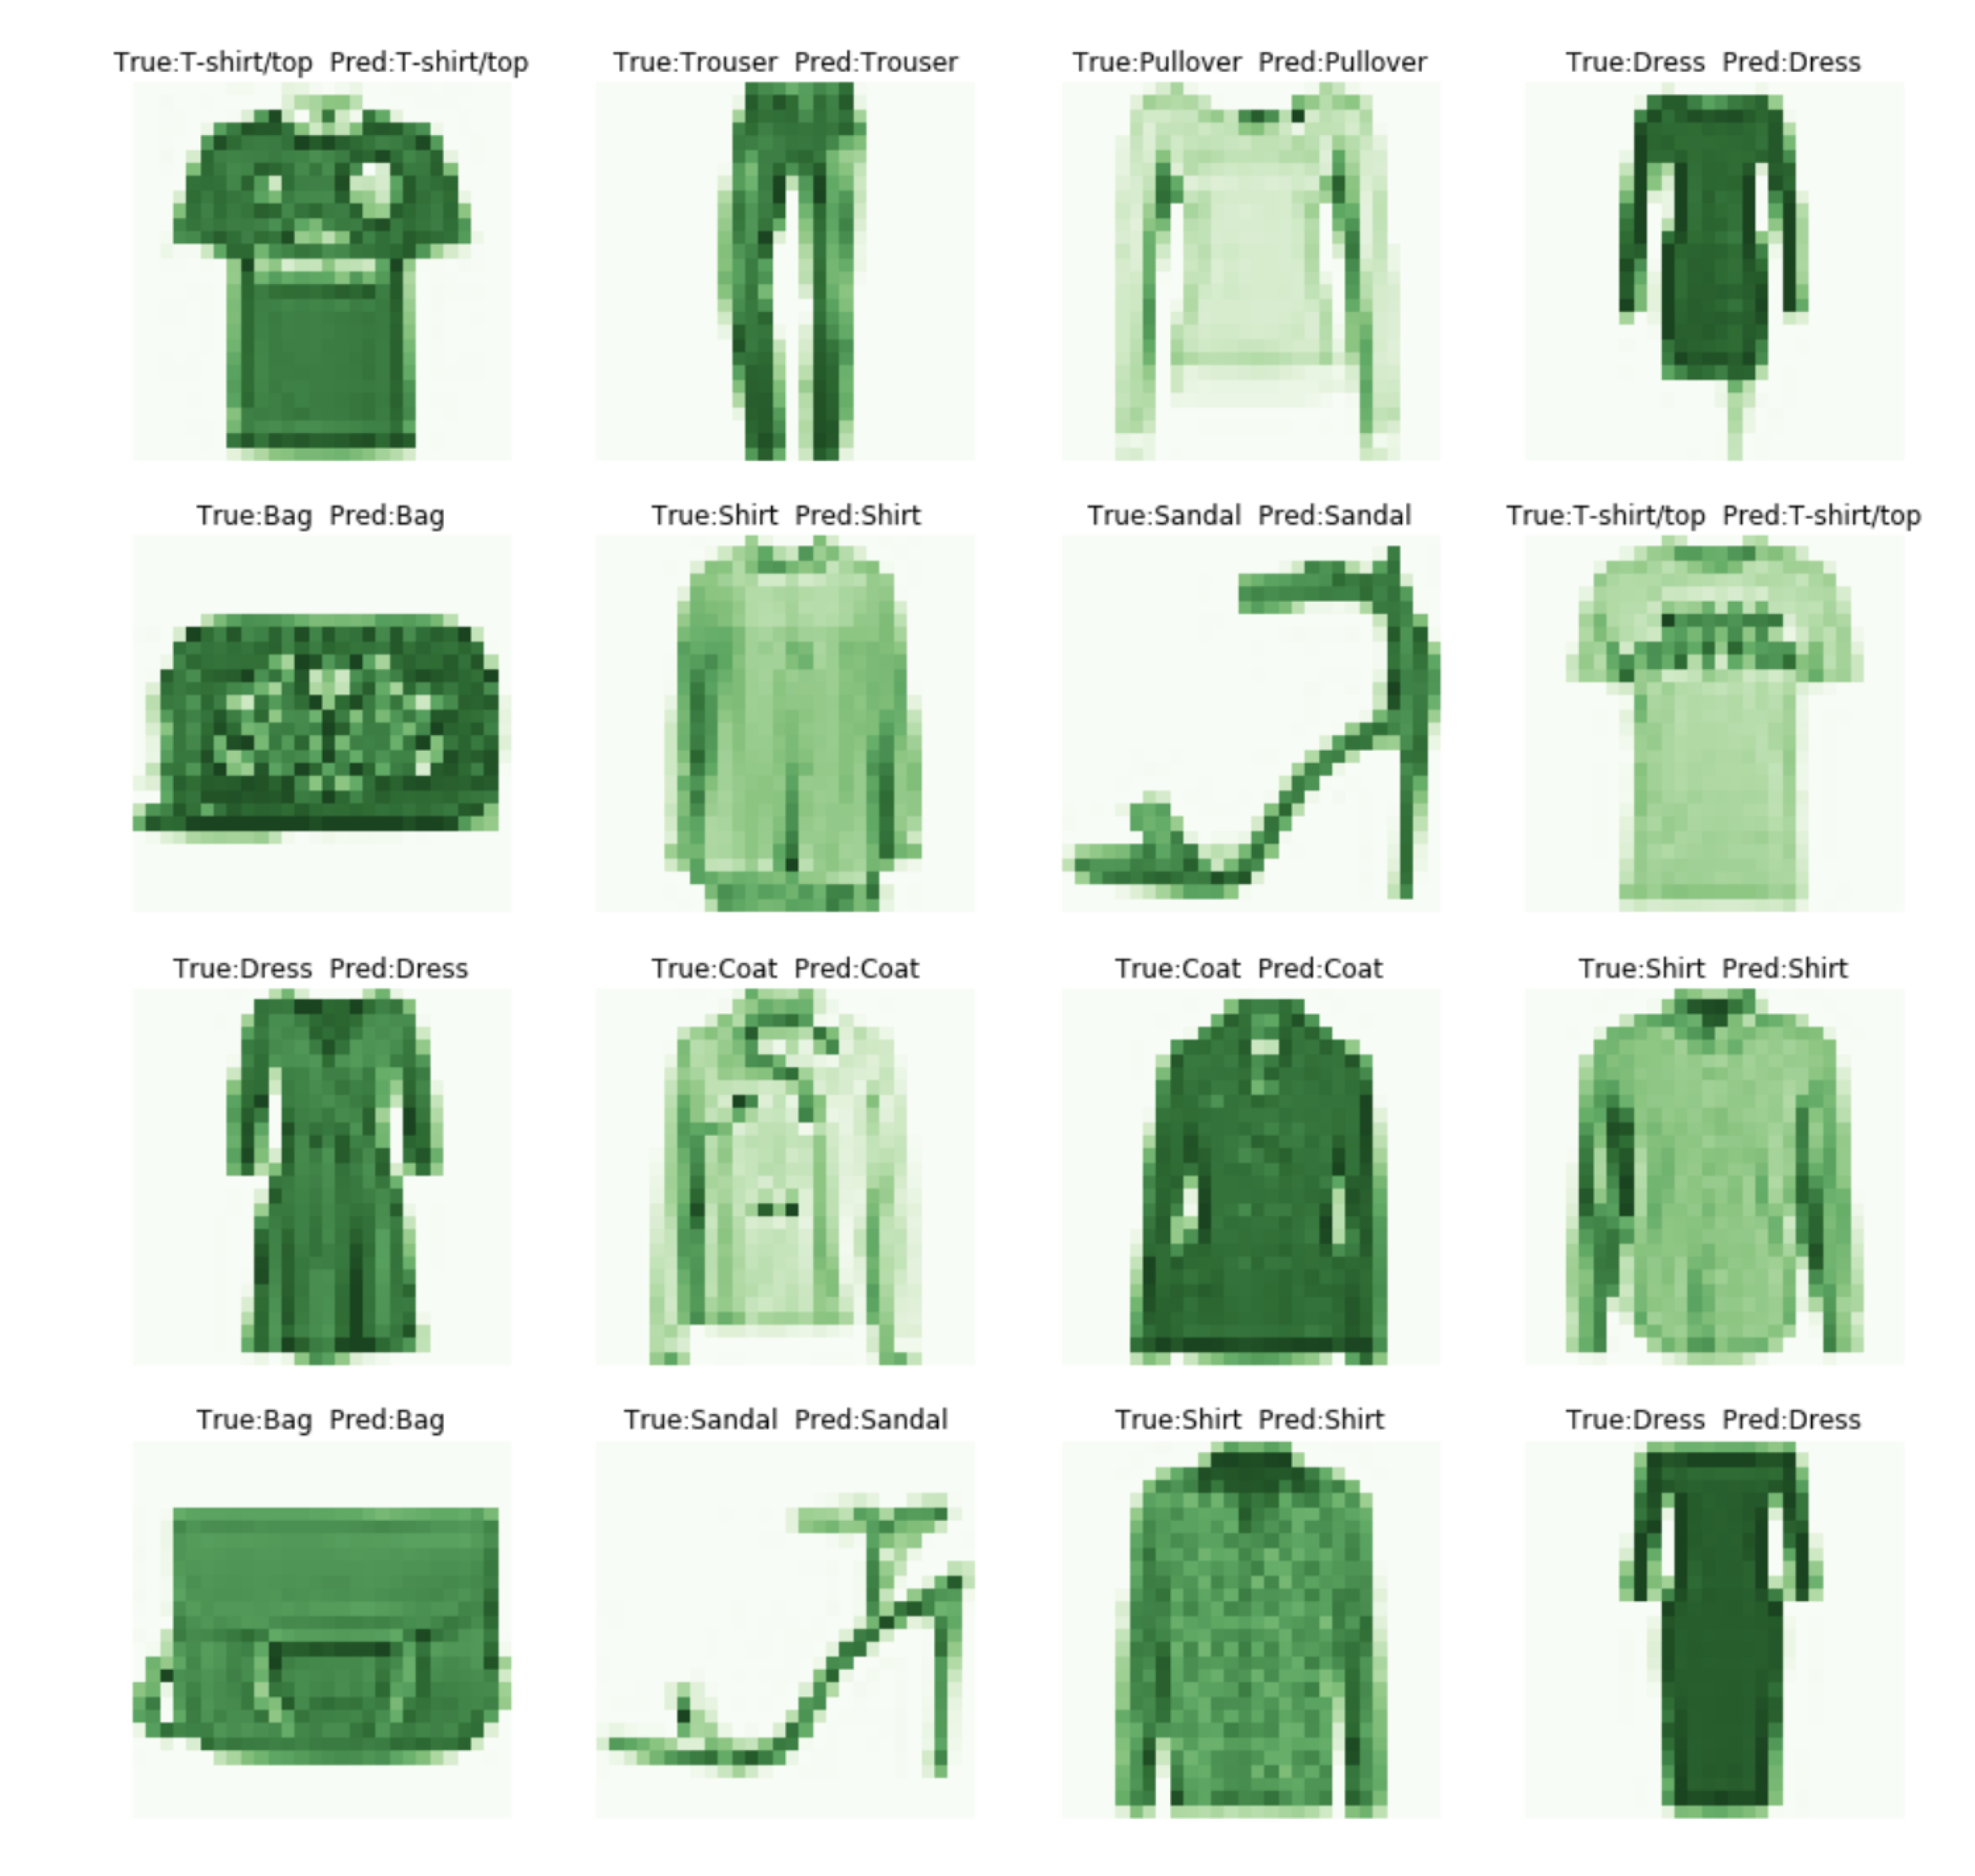

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()

plot_images(correct, "Greens")

# Incorrectly classified images

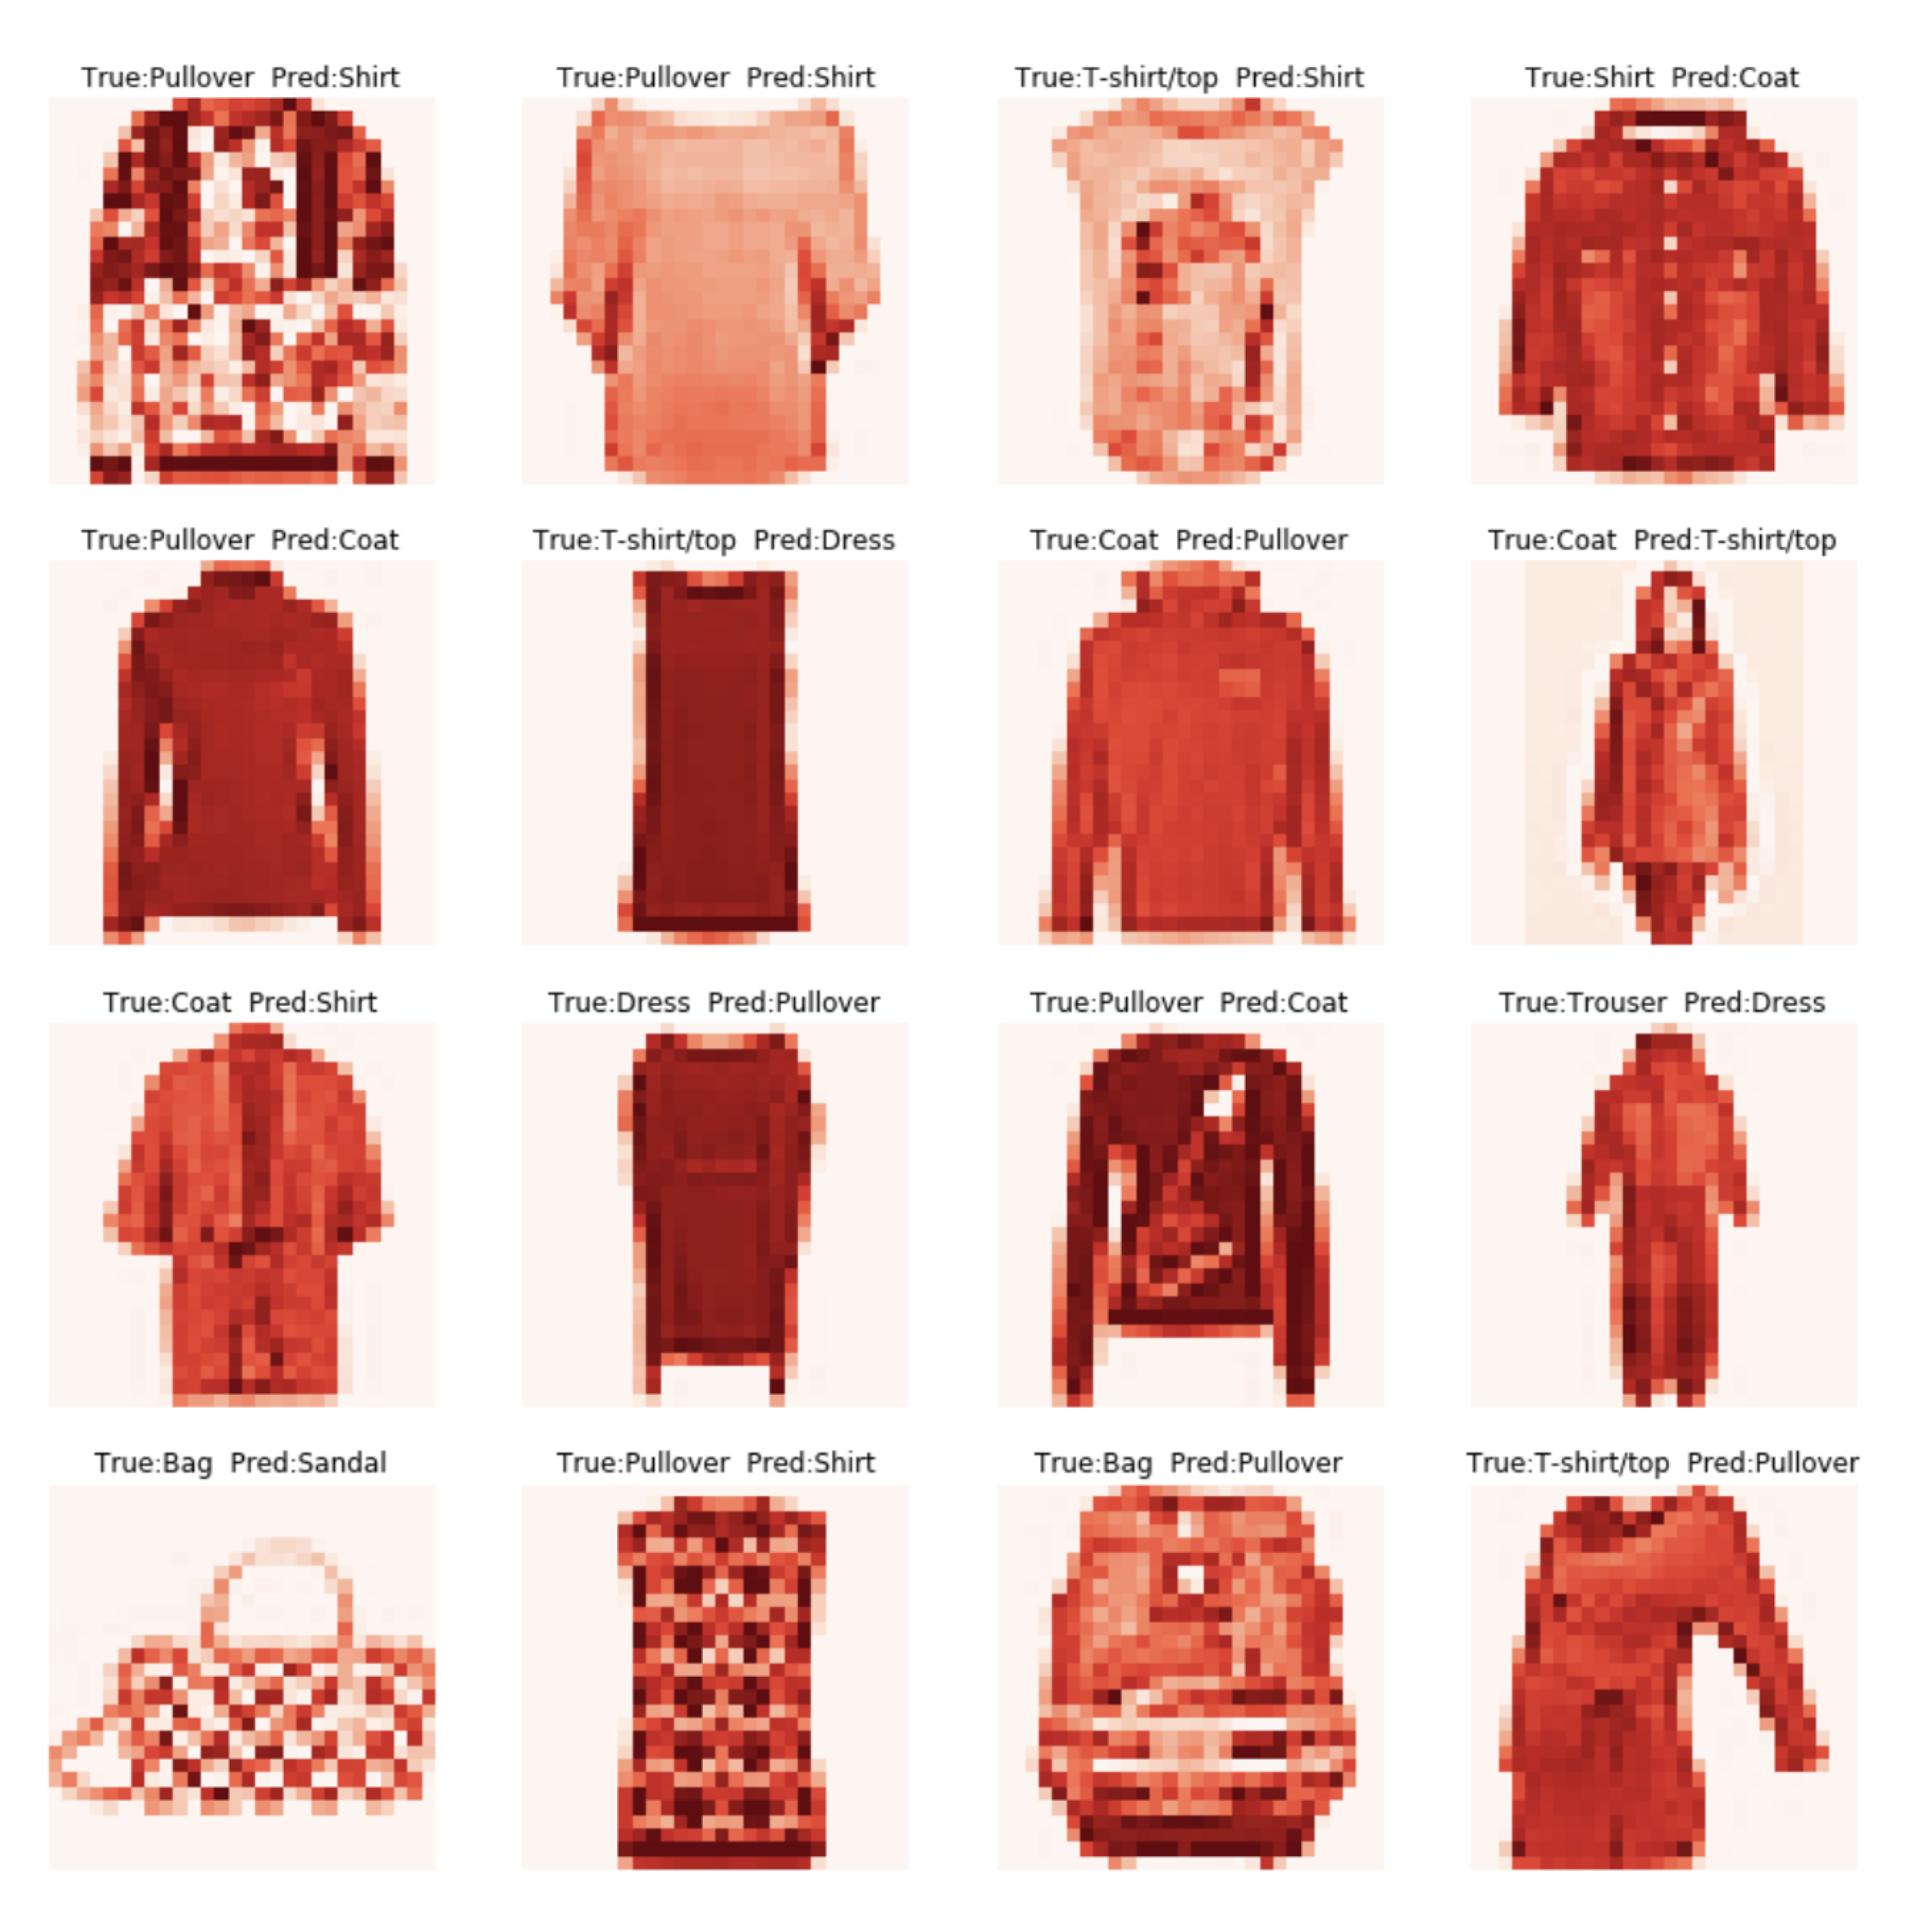

In [ ]:
plot_images(incorrect, "Reds")

With a  sequential model with multiple convolution layers and 35 epochs for the training, model obtained an accuracy of around 0.91 for test set prediction. After checking the validation accuracy and loss, I got to know that the model is overfitting.
Upon retraining the model with Dropout layers to the model to reduce overfitting, model improvement was confirmed and with the same number of epochs for the training we obtained with the new model an accuracy of around 0.93 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt) and Class 2 (Pullover).